In [1]:
url = 'https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt'

In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
%matplotlib inline

In [166]:
df = pd.read_csv(url,index_col=0)

In [167]:
df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
644,1359.156,7,15,3,2,2,45000
645,377.148,4,10,1,1,1,24800
646,740.064,13,14,1,1,1,45000
647,1707.840,3,14,3,2,2,65000


In [168]:
df.reset_index(drop=True,inplace=True)

In [169]:
df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [170]:
# Renaming misspelt column
df.rename({'Living.Room':'Livingroom'},axis=1,inplace=True)

In [171]:
df.dtypes

Sqft          float64
Floor           int64
TotalFloor      int64
Bedroom         int64
Livingroom      int64
Bathroom        int64
Price           int64
dtype: object

In [172]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [173]:
df.isnull().sum()

Sqft          0
Floor         0
TotalFloor    0
Bedroom       0
Livingroom    0
Bathroom      0
Price         0
dtype: int64

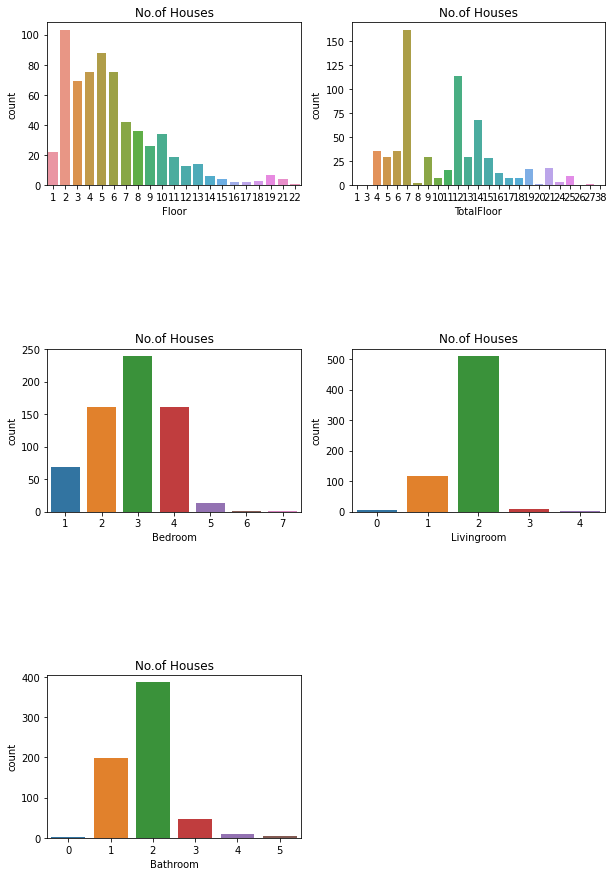

In [174]:
features=['Floor','TotalFloor','Bedroom','Livingroom','Bathroom']
fig=plt.subplots(figsize=(10,15))
for i,j in enumerate(features):
    plt.subplot(3,2,i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j,data=df)
    plt.title('No.of Houses')

The frequency of Houses with 3 bedrooms is highest followed by 2 Bedrooms and 4 Bedrooms

The frequency of Houses with 2 Livingroom is highest followed by 1 livingroom

The frequency of Houses with 2 Bathroom is highest followed by 1 Bathroom

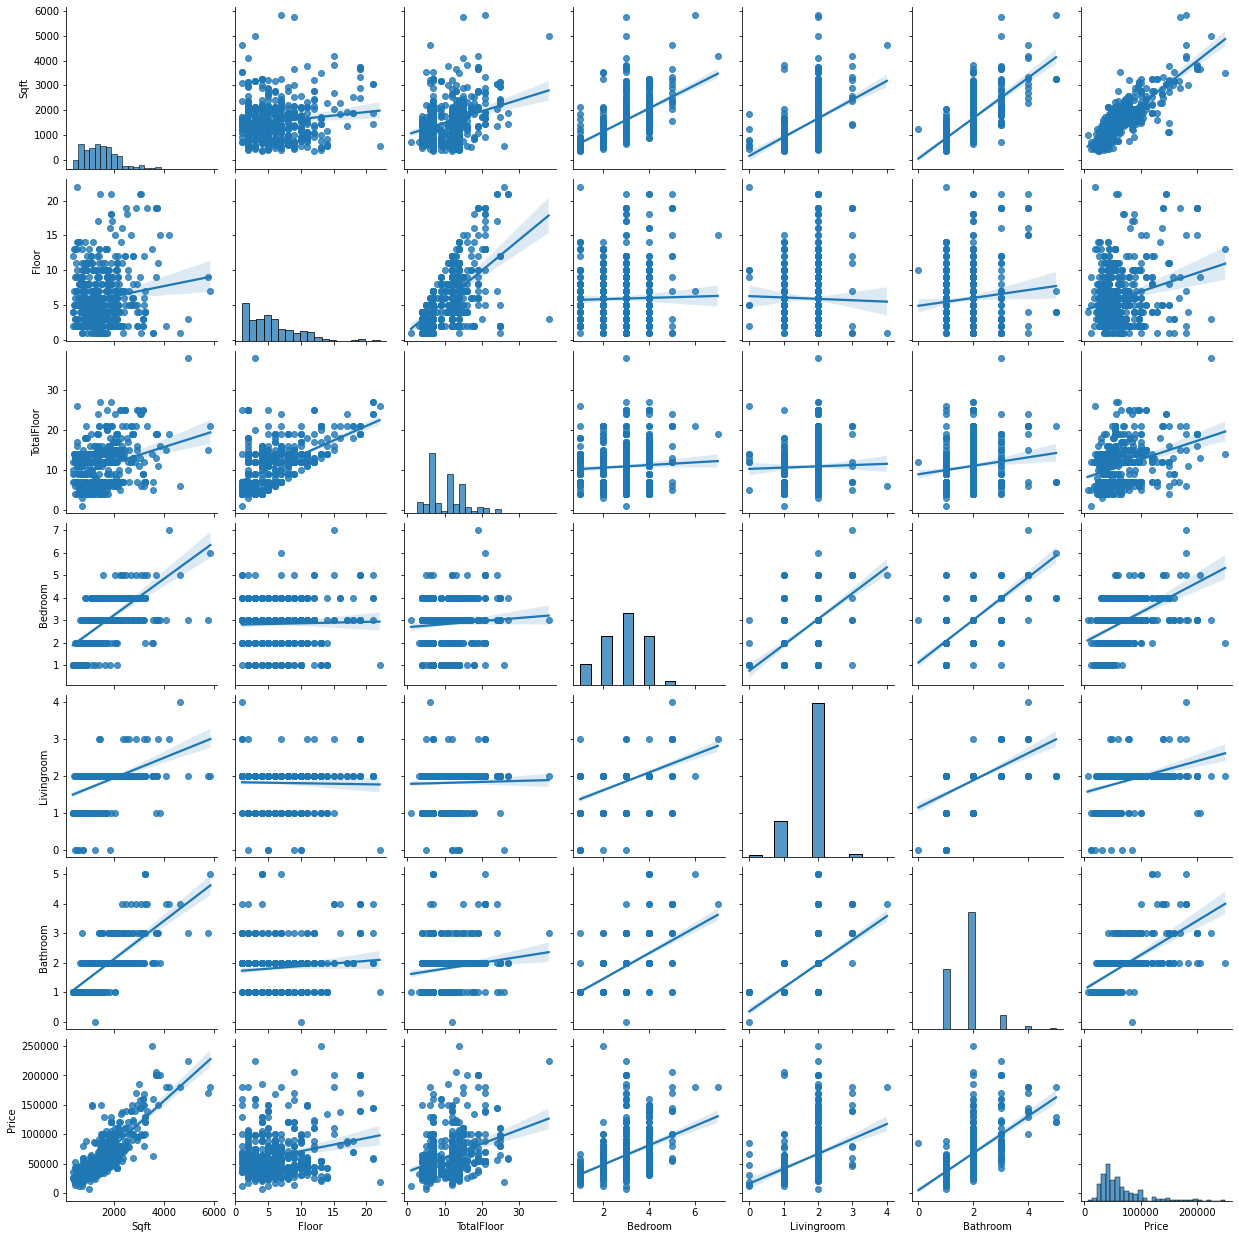

In [175]:
# Relation of each feature and target with one another
sns.pairplot(df,kind='reg')

It seems Sqft is positively correlated to Price more than others, lets look into it.

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

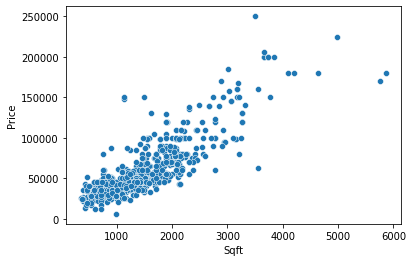

In [176]:
sns.scatterplot(data=df,x='Sqft',y='Price')

In [177]:
df[['Price']].corrwith(df['Sqft'])

Price    0.825514
dtype: float64

Sqft column has correlation 0.825514 with target Price, with some outliers present, lets remove some outliers

The rows with Sqft value greater than 4500 are to be removed.

Similarly rows with price value greater than 200000 are to be removed.

In [187]:
df = df[df['Sqft']<=4500]

In [188]:
df = df[df['Price']<=200000]

In [190]:
# Lets choose features for the Model with correlation
corr = df.corr()

<AxesSubplot:>

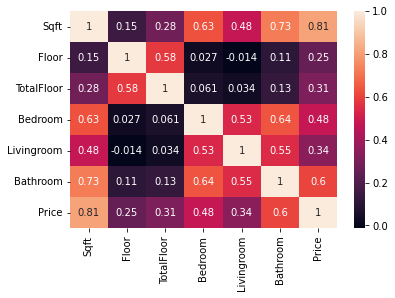

In [192]:
sns.heatmap(corr,annot=True)

In [193]:
# The feature Sqft is highly correlated to target Price followed by Bathroom
# But Bathroom and Sqft are Positively correlated to each other with correlation of 0.73 so choosing just Sqft
# Similarly choosing two more features

features = ['Sqft','Bedroom','Livingroom']

In [217]:
# seperating X and Y
X = df[features]
Y = df['Price']

In [218]:
# Scaling the X
mm = MinMaxScaler()
X = mm.fit_transform(X)

In [219]:
# Splitting data into training and testing
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=51)

In [220]:
lm = LinearRegression()

In [221]:
lm.fit(x_train,y_train)

LinearRegression()

In [222]:
y_train_pred = lm.predict(x_train)
y_test_pred = lm.predict(x_test)

In [223]:
r2 = metrics.r2_score

In [224]:
print('Training Score : ',r2(y_train,y_train_pred))
print('Testing Score : ',r2(y_test,y_test_pred))

Training Score :  0.6538339027269577
Testing Score :  0.7191185952030404


In [258]:
# Lets try adding TotalFloor into the features

features = ['Sqft','Bedroom','Livingroom','TotalFloor']
X = df[features]
Y = df['Price']
mm = MinMaxScaler()
X = mm.fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=51)
lm = LinearRegression()
lm.fit(x_train,y_train)
y_train_pred = lm.predict(x_train)
y_test_pred = lm.predict(x_test)
r2 = metrics.r2_score
print('Training Score : ',r2(y_train,y_train_pred))
print('Testing Score : ',r2(y_test,y_test_pred))

Training Score :  0.6538339027269577
Testing Score :  0.7191185952030404


In [297]:
# One with all the features
X = df.drop(['Price'],axis=1)
Y = df['Price']
mm = MinMaxScaler()
X = mm.fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=51)
lm = LinearRegression()
lm.fit(x_train,y_train)
y_train_pred = lm.predict(x_train)
y_test_pred = lm.predict(x_test)
r2 = metrics.r2_score
print('Training Score : ',r2(y_train,y_train_pred))
print('Testing Score : ',r2(y_test,y_test_pred))

Training Score :  0.6655288870416319
Testing Score :  0.728933959680129


In [295]:
from sklearn.preprocessing import PolynomialFeatures

In [317]:
poly_features = PolynomialFeatures(degree=2)

In [318]:
x_train_poly = poly_features.fit_transform(x_train)
poly_model = LinearRegression()
poly_model.fit(x_train_poly,y_train)
y_train_predicted = poly_model.predict(x_train_poly)
y_test_predict = poly_model.predict(poly_features.fit_transform(x_test))

rmse_train = np.sqrt(metrics.mean_absolute_error(y_train,y_train_predicted))
r2_train = metrics.r2_score(y_train,y_train_predicted)

rmse_test = np.sqrt(metrics.mean_absolute_error(y_test,y_test_predict))
r2_test = metrics.r2_score(y_test,y_test_predict)

print('Training: ')
print('Rmse : ',rmse_train)
print('R2 : ',r2_train)
print('\nTesting:')
print('Rmse : ',rmse_test)
print('R2 : ',r2_test)

Training: 
Rmse :  113.03751575916148
R2 :  0.7128779582647782

Testing:
Rmse :  108.74703179257777
R2 :  0.7521116353586119
